In [1]:
# Importing the libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as  sns

In [2]:
# Importing the dataset
dataset = pd.read_csv('wine-clustering.csv')

In [3]:
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
dataset.shape

(178, 13)

<AxesSubplot:>

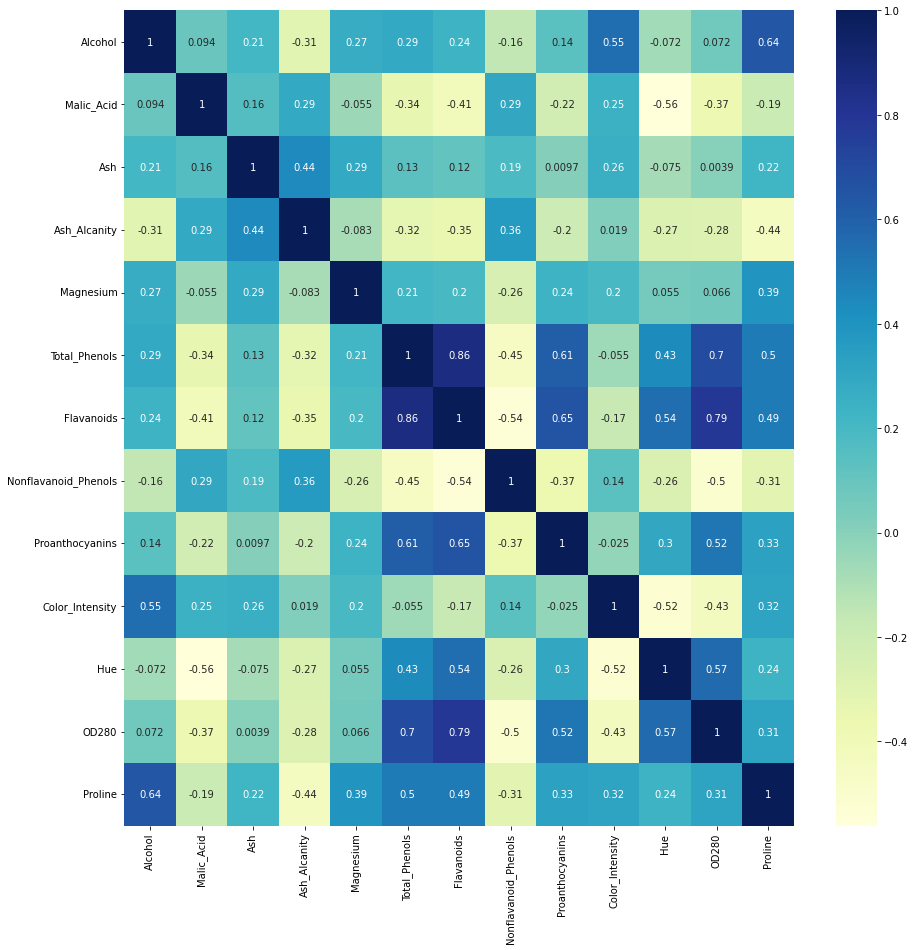

In [5]:
plt.figure(figsize=(15,15))
sns.heatmap(dataset.corr(), annot=True,cmap="YlGnBu")

In [6]:
X1 = dataset.iloc[:, [5, 6]].values

In [7]:
X1.shape

(178, 2)

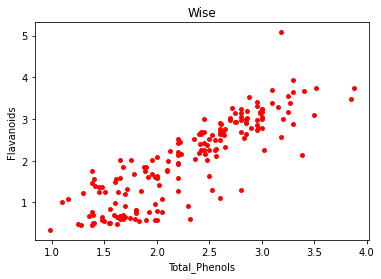

In [8]:
plt.scatter(X1[:,0],X1[:,1],s=15,c='red')
plt.title('Wise')
plt.xlabel('Total_Phenols')
plt.ylabel('Flavanoids')
plt.show()

In [9]:
X1=X1[X1[:,1]<4.5]

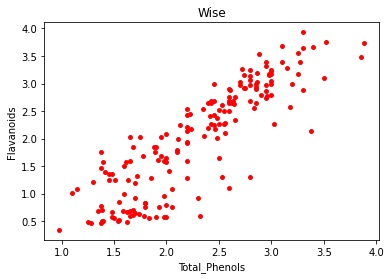

In [10]:
plt.scatter(X1[:,0],X1[:,1],s=15,c='red')
plt.title('Wise')
plt.xlabel('Total_Phenols')
plt.ylabel('Flavanoids')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X_train1,X_test1 =train_test_split(X1,test_size=0.1,shuffle=True,random_state=42)

In [12]:
X_train1.shape

(159, 2)

In [13]:
X_test1.shape

(18, 2)

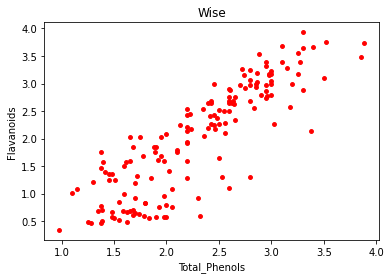

In [14]:
plt.scatter(X_train1[:,0],X_train1[:,1],s=15,c='red')
plt.title('Wise')
plt.xlabel('Total_Phenols')
plt.ylabel('Flavanoids')
plt.show()

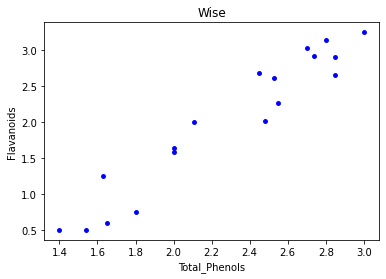

In [15]:
plt.scatter(X_test1[:,0],X_test1[:,1],s=15,c='blue')
plt.title('Wise')
plt.xlabel('Total_Phenols')
plt.ylabel('Flavanoids')
plt.show()

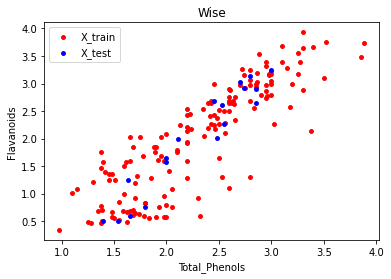

In [16]:
plt.scatter(X_train1[:,0],X_train1[:,1],s=15,c='red',label='X_train')
plt.scatter(X_test1[:,0],X_test1[:,1],s=15,c='blue',label='X_test')
plt.title('Wise')
plt.xlabel('Total_Phenols')
plt.ylabel('Flavanoids')
plt.legend()
plt.show()

In [17]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train1)
    wcss.append(kmeans.inertia_)

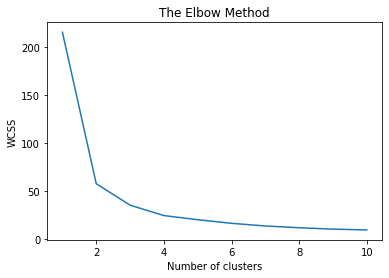

In [18]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
num_cluster=3
# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = num_cluster, init = 'k-means++', random_state = 42)
kmeans.fit_transform(X_train1)
y_kmeans1 = kmeans.fit_predict(X_test1)
color=['red','blue','green','cyan']

In [20]:
for i in range(10):
    print("Point ",X_test1[i]," in Cluster ",y_kmeans1[i])

Point  [2.7  3.03]  in Cluster  0
Point  [2.85 2.65]  in Cluster  0
Point  [1.54 0.5 ]  in Cluster  2
Point  [3.   3.25]  in Cluster  0
Point  [2.11 2.  ]  in Cluster  1
Point  [2.8  3.14]  in Cluster  0
Point  [2.   1.64]  in Cluster  1
Point  [1.8  0.75]  in Cluster  2
Point  [2.74 2.92]  in Cluster  0
Point  [1.4 0.5]  in Cluster  2


In [21]:
for i in range(num_cluster):
    print(f"Cluster {i} ",len(y_kmeans1[y_kmeans1==i]))

Cluster 0  8
Cluster 1  5
Cluster 2  5


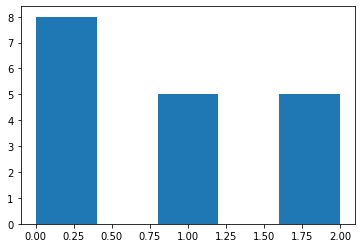

In [22]:
plt.hist(y_kmeans1,bins=5)
plt.show()

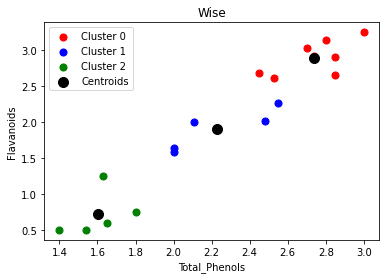

In [23]:
for i in range(num_cluster):
    plt.scatter(X_test1[y_kmeans1 == i, 0], X_test1[y_kmeans1 == i, 1], s = 50, c = color[i], label = f'Cluster {i}')
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Wise')
plt.xlabel('Total_Phenols')
plt.ylabel('Flavanoids')
plt.legend()
plt.show()

In [24]:
num_cluster=2
# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = num_cluster, init = 'k-means++', random_state = 42)
kmeans.fit_transform(X_train1)
y_kmeans2 = kmeans.fit_predict(X_test1)
color=['red','blue']

In [25]:
for i in range(10):
    print("Point ",X_test1[i]," in Cluster ",y_kmeans2[i])

Point  [2.7  3.03]  in Cluster  1
Point  [2.85 2.65]  in Cluster  1
Point  [1.54 0.5 ]  in Cluster  0
Point  [3.   3.25]  in Cluster  1
Point  [2.11 2.  ]  in Cluster  1
Point  [2.8  3.14]  in Cluster  1
Point  [2.   1.64]  in Cluster  0
Point  [1.8  0.75]  in Cluster  0
Point  [2.74 2.92]  in Cluster  1
Point  [1.4 0.5]  in Cluster  0


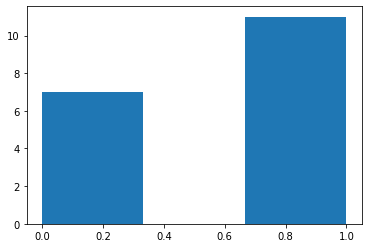

In [26]:
plt.hist(y_kmeans2,bins=3)
plt.show()

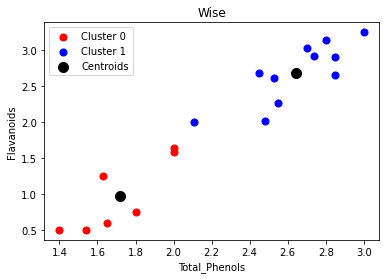

In [27]:
for i in range(num_cluster):
    plt.scatter(X_test1[y_kmeans2 == i, 0], X_test1[y_kmeans2 == i, 1], s = 50, c = color[i], label = f'Cluster {i}')
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Wise')
plt.xlabel('Total_Phenols')
plt.ylabel('Flavanoids')
plt.legend()
plt.show()

In [28]:
X2 = dataset.iloc[:, [6, -2]].values

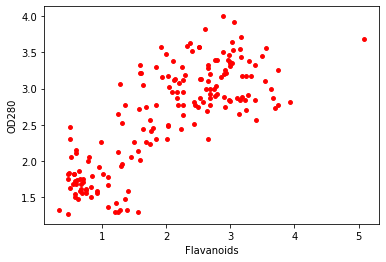

In [29]:
plt.scatter(X2[:,0],X2[:,1],s=15,c='red')
plt.title('')
plt.xlabel('Flavanoids')
plt.ylabel('OD280')
plt.show()

In [30]:
X2=X2[X2[:,0]<4.5]

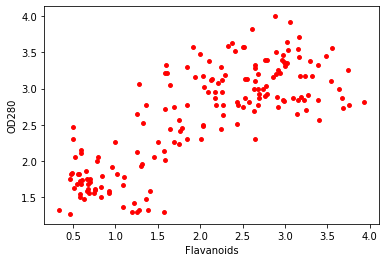

In [31]:
plt.scatter(X2[:,0],X2[:,1],s=15,c='red')
plt.title('')
plt.xlabel('Flavanoids')
plt.ylabel('OD280')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
X_train2,X_test2 =train_test_split(X2,test_size=0.1,shuffle=True,random_state=42)

In [33]:
X_train2.shape

(159, 2)

In [34]:
X_test2.shape

(18, 2)

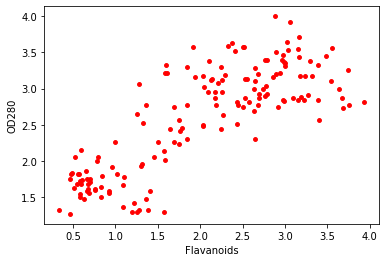

In [35]:
plt.scatter(X_train2[:,0],X_train2[:,1],s=15,c='red')
plt.title('')
plt.xlabel('Flavanoids')
plt.ylabel('OD280')
plt.show()

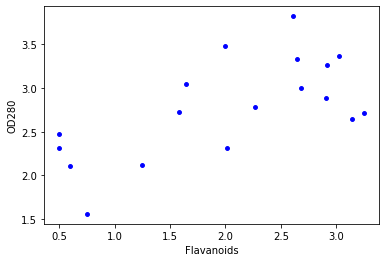

In [36]:
plt.scatter(X_test2[:,0],X_test2[:,1],s=15,c='blue')
plt.title('')
plt.xlabel('Flavanoids')
plt.ylabel('OD280')
plt.show()

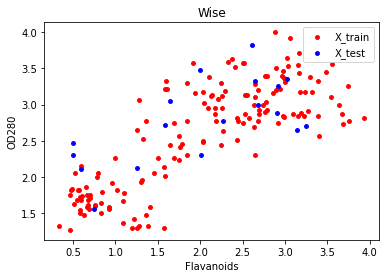

In [37]:
plt.scatter(X_train2[:,0],X_train2[:,1],s=15,c='red',label='X_train')
plt.scatter(X_test2[:,0],X_test2[:,1],s=15,c='blue',label='X_test')
plt.title('Wise')
plt.xlabel('Flavanoids')
plt.ylabel('OD280')
plt.legend()
plt.show()

In [38]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train2)
    wcss.append(kmeans.inertia_)

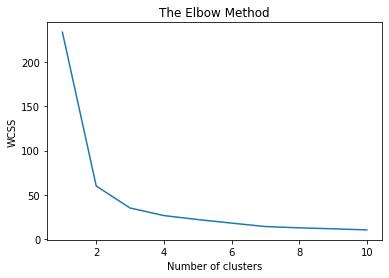

In [39]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [40]:
num_cluster=3
# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = num_cluster, init = 'k-means++', random_state = 42)
kmeans.fit_transform(X_train2)
y_kmeans3 = kmeans.fit_predict(X_test2)
color=['red','blue','green','cyan']

In [41]:
for i in range(10):
    print("Point ",X_test2[i]," in Cluster ",y_kmeans3[i])


Point  [3.03 3.36]  in Cluster  2
Point  [2.65 3.33]  in Cluster  2
Point  [0.5  2.31]  in Cluster  1
Point  [3.25 2.71]  in Cluster  2
Point  [2.   3.48]  in Cluster  0
Point  [3.14 2.65]  in Cluster  2
Point  [1.64 3.05]  in Cluster  0
Point  [0.75 1.56]  in Cluster  1
Point  [2.92 3.26]  in Cluster  2
Point  [0.5  2.47]  in Cluster  1


In [42]:
for i in range(num_cluster):
    print(f"Cluster {i} ",len(y_kmeans3[y_kmeans3==i]))

Cluster 0  5
Cluster 1  5
Cluster 2  8


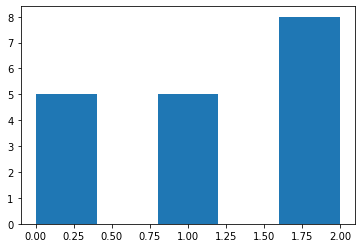

In [43]:
plt.hist(y_kmeans3,bins=5)
plt.show()

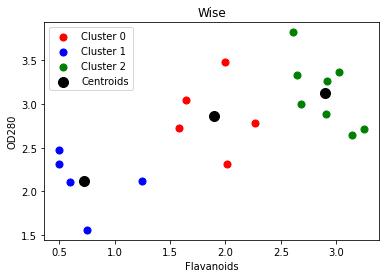

In [44]:
for i in range(num_cluster):
    plt.scatter(X_test2[y_kmeans3 == i, 0], X_test2[y_kmeans3 == i, 1], s = 50, c = color[i], label = f'Cluster {i}')
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Wise')
plt.xlabel('Flavanoids')
plt.ylabel('OD280')
plt.legend()
plt.show()

In [45]:
num_cluster=2
# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = num_cluster, init = 'k-means++', random_state = 42)
kmeans.fit_transform(X_train2)
y_kmeans4 = kmeans.fit_predict(X_test2)
color=['red','blue']

In [46]:
for i in range(10):
    print("Point ",X_test2[i]," in Cluster ",y_kmeans4[i])


Point  [3.03 3.36]  in Cluster  1
Point  [2.65 3.33]  in Cluster  1
Point  [0.5  2.31]  in Cluster  0
Point  [3.25 2.71]  in Cluster  1
Point  [2.   3.48]  in Cluster  1
Point  [3.14 2.65]  in Cluster  1
Point  [1.64 3.05]  in Cluster  0
Point  [0.75 1.56]  in Cluster  0
Point  [2.92 3.26]  in Cluster  1
Point  [0.5  2.47]  in Cluster  0


In [47]:
for i in range(num_cluster):
    print(f"Cluster {i} ",len(y_kmeans3[y_kmeans4==i]))

Cluster 0  8
Cluster 1  10


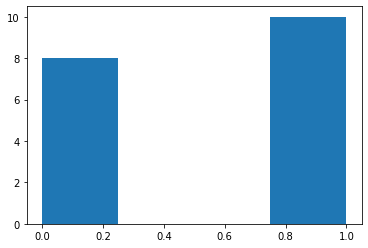

In [48]:
plt.hist(y_kmeans4,bins=4)
plt.show()

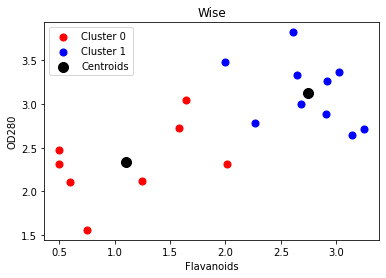

In [49]:
for i in range(num_cluster):
    plt.scatter(X_test2[y_kmeans4 == i, 0], X_test2[y_kmeans4 == i, 1], s = 50, c = color[i], label = f'Cluster {i}')
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Wise')
plt.xlabel('Flavanoids')
plt.ylabel('OD280')
plt.legend()
plt.show()